<a href="https://colab.research.google.com/github/rakshithcgowda/Machine-learning-project/blob/main/Multi-Class%20Prediction%20of%20Obesity%20Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, \
    RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('obesity.csv')
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.shape

(20758, 18)

In [4]:
data = data.fillna(np.nan)

missing_value = data.isnull().sum()
print(missing_value)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


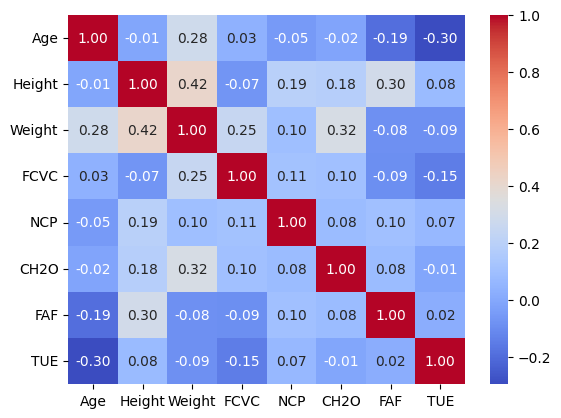

In [6]:
HeatMatrix = sns.heatmap(data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF',"TUE"]].corr() , annot=True,fmt = ".2f" , cmap ="coolwarm")

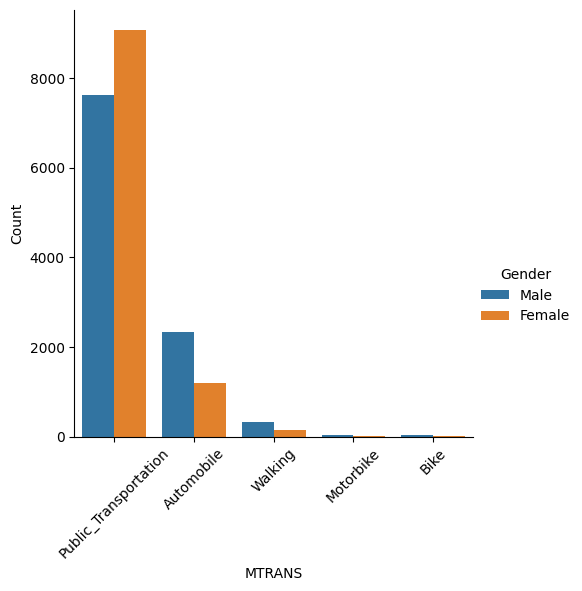

In [7]:
# plotting the the categorical variable in the sns heatmap

g = sns.catplot(x='MTRANS',hue='Gender',data=data , kind='count')
g = g.set_ylabels('Count')
g = g.set_xticklabels(rotation = 45)

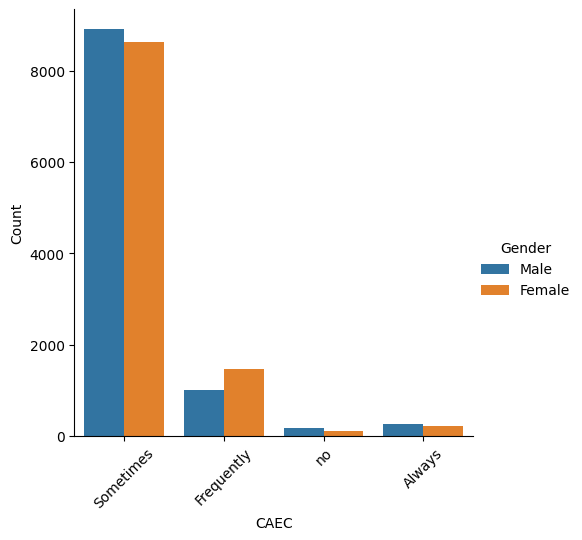

In [9]:
g = sns.catplot(x="CAEC", hue="Gender", data=data, kind="count")
g = g.set_ylabels("Count")
g = g.set_xticklabels(rotation=45)

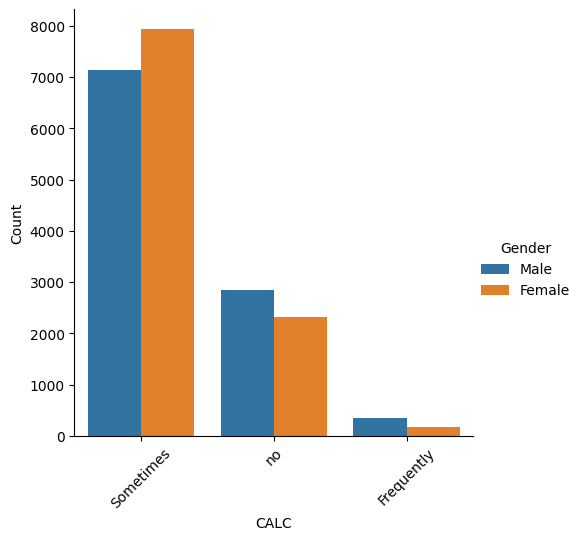

In [10]:
g = sns.catplot(x="CALC", hue="Gender", data=data, kind="count")
g = g.set_ylabels("Count")
g = g.set_xticklabels(rotation=45)

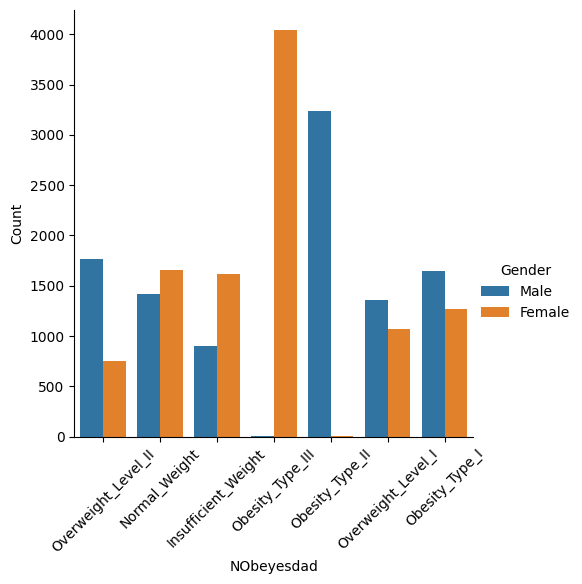

In [11]:
g = sns.catplot(x="NObeyesdad", hue="Gender", data=data, kind="count")
g = g.set_ylabels("Count")
g = g.set_xticklabels(rotation=45)

In [12]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
train_df = pd.read_csv('obesity.csv')
test_df = pd.read_csv('obesity(test).csv')
combine = [train_df, test_df]
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1}).astype(int)
    dataset['family_history_with_overweight'] = dataset['family_history_with_overweight'].map({'no': 0, 'yes': 1}).astype(int)
    dataset['FAVC'] = dataset['FAVC'].map({'no': 0, 'yes': 1}).astype(int)
    dataset['CAEC'] = dataset['CAEC'].map({'no': 0, 'Frequently': 1, 'Sometimes': 2, 'Always': 3}).astype(int)
    dataset['SMOKE'] = dataset['SMOKE'].map({'no': 0, 'yes': 1}).astype(int)
    dataset['SCC'] = dataset['SCC'].map({'no': 0, 'yes': 1}).astype(int)
    dataset['CALC'] = dataset['CALC'].map({'no': 0, 'Frequently': 1, 'Sometimes': 2, 'Always': 3}).astype(int)
    dataset['MTRANS'] = dataset['MTRANS'].map({'Automobile': 0, 'Motorbike': 1, 'Public_Transportation': 2, 'Bike': 3, 'Walking': 4})

In [24]:
train_df, test_df = combine[0], combine[1]
target = train_df["NObeyesdad"]
train_df = train_df.drop("NObeyesdad", axis=1)
test_id = test_df["id"]

In [25]:
dict_target = {'Insufficient_Weight':0,
                'Normal_Weight':1,
                'Overweight_Level_I':2,
                'Overweight_Level_II':3,
                'Obesity_Type_I':4,
                'Obesity_Type_II':5,
                'Obesity_Type_III':6}

target = target.map(dict_target)
target.head()

0    3
1    1
2    0
3    6
4    3
Name: NObeyesdad, dtype: int64

In [26]:
X_train, X_val, y_train, y_val = train_test_split(train_df, target, test_size=0.3, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14530, 17), (6228, 17), (14530,), (6228,))

In [27]:
def evaluate(clf):
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_val)
    train_score = np.mean(y_pred_train == y_train)
    val_score = np.mean(y_pred_test == y_val)

    print("Train score:", round(train_score, 4))
    print("Test score:", round(val_score, 4))

    if train_score - val_score > 0.05:
        print("Overfitting warning!!!")

In [28]:
clf1 = XGBClassifier()
clf1.fit(X_train, y_train)

print("XGBoost")
evaluate(clf1)

XGBoost
Train score: 0.9952
Test score: 0.9003
Overfitting warning!!!


In [29]:
clf2 = AdaBoostClassifier()
clf2.fit(X_train, y_train)

print("AdaBoost")
evaluate(clf2)

AdaBoost
Train score: 0.4343
Test score: 0.4398


In [30]:
clf3 = GradientBoostingClassifier()
clf3.fit(X_train, y_train)

print("Gradient Boosting")
evaluate(clf3)

Gradient Boosting
Train score: 0.9244
Test score: 0.9021


In [31]:
clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

print("Random Forest")
evaluate(clf4)

Random Forest
Train score: 1.0
Test score: 0.8963
Overfitting warning!!!


In [32]:
clf5 = KNeighborsClassifier()
clf5.fit(X_train, y_train)

print("K Neighbors")
evaluate(clf5)

K Neighbors
Train score: 0.6491
Test score: 0.4355
Overfitting warning!!!


In [33]:
clf6 = DecisionTreeClassifier()
clf6.fit(X_train, y_train)

print("Decision Tree")
evaluate(clf6)

Decision Tree
Train score: 1.0
Test score: 0.8377
Overfitting warning!!!


In [34]:
clf7 = ExtraTreesClassifier()
clf7.fit(X_train, y_train)

print("Extra Trees")
evaluate(clf7)

Extra Trees
Train score: 1.0
Test score: 0.877
Overfitting warning!!!


In [35]:
clf8 = SVC(probability=True, gamma='auto')
clf8.fit(X_train, y_train)

print("SVM")
evaluate(clf8)

SVM
Train score: 0.9998
Test score: 0.2725
Overfitting warning!!!


In [36]:
result_predict = pd.Series(clf3.predict(test_df), name="NObeyesdad")
reverse_dict_target = {v: k for k, v in dict_target.items()}
target_decoded = result_predict.map(reverse_dict_target)